# Value at Risk Simulations

--abukar ali

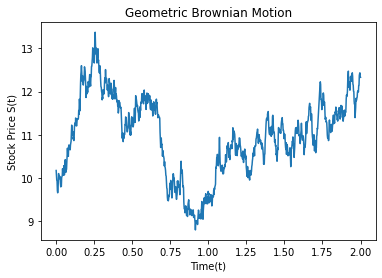

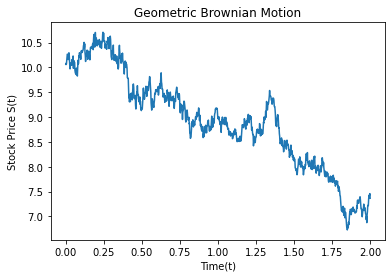

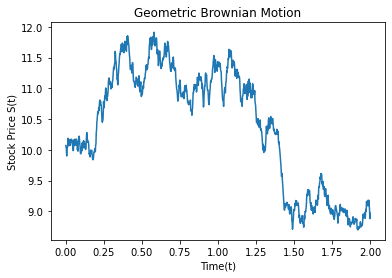

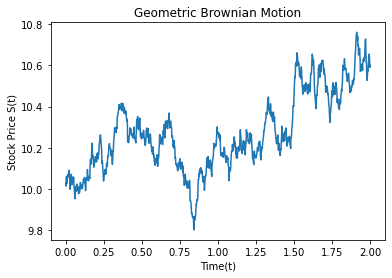

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_geometric_random_walk(S0, T=2,N=1000,mu=0.1,sigma=0.24):
    
    dt=T/N
    t=np.linspace(0,T,N)
    
    # standard normal distribution with mean=0, and variance = 1. 
    W = np.random.standard_normal(size=N)
    
    # N(0,dt) = sqrt(dt)*N(0,1)
    W = np.cumsum(W)*np.sqrt(dt)
    X = (mu -0.5*sigma**2)*t+sigma*W
    #print(W)
    #print(dt)
    #print(t)
    
    S=S0 *np.exp(X)
    
    return t,S

def plot_simulation(t, S):
    plt.plot(t, S)
    plt.xlabel('Time(t)')
    plt.ylabel('Stock Price S(t)')
    plt.title('Geometric Brownian Motion')
    plt.show()
    
if __name__ == '__main__':
    
    time, data = simulate_geometric_random_walk(10,mu=0.1, sigma=0.26)
    time2, data2 = simulate_geometric_random_walk(10,mu=0.1, sigma=0.20)
    time3, data3 = simulate_geometric_random_walk(10,mu=0.1, sigma=0.15)
    time4, data4 = simulate_geometric_random_walk(10,mu=0.1, sigma=0.05)
    plot_simulation(time, data)
    plot_simulation(time2, data2)
    plot_simulation(time3, data3)
    plot_simulation(time4, data4)
    
    
    

# MontoCarlo Pricing Methods

In [36]:
import numpy as np
class OptionPricing:
    def __init__(self,S0,E,T,rf,sigma,iterations):
        self.S0 = S0
        self.E = E
        self.T=T
        self.rf=rf
        self.sigma=sigma
        self.iterations = iterations
        
    def call_option_simulation(self):
        #we have 2 columns: first with zero's and the second column will store the payoff
        #we need the first column of zeros: payoff function is max(0, S-E) for call option
        option_data = np.zeros([self.iterations,2])
        
        #dimenstions: 1 dimensional array with as many times as the iterations
        rand = np.random.normal(0,1,[1,self.iterations])
        
        # equation for the asset price S(t) at time t
        
        asset_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)
                                     +self.sigma*np.sqrt(self.T)*rand)
        
        # we need S - E because we have to calculate the function max(S-E,0)
        option_data[:,1] = asset_price - self.E
        
        # average for the Monte Carlo simulation
        # max() return the max (0,S-E) according to the formula
        #this is the average value
        
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
        
        # have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average
        
        
    def put_option_simulation(self):
        #we have 2 columns: first with zero's and the second column will store the payoff
        #we need the first column of zeros: payoff function is max(0, S-E) for call option
        option_data = np.zeros([self.iterations,2])
        
        #dimenstions: 1 dimensional array with as many times as the iterations
        rand = np.random.normal(0,1,[1,self.iterations])
        
        # equation for the asset price S(t) at time t
        
        asset_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)
                                     +self.sigma*np.sqrt(self.T)*rand)
        
        # we need S - E because we have to calculate the function max(E-S,0)
        option_data[:,1] = self.E - asset_price 
        
        # average for the Monte Carlo simulation
        # max() return the max (0,S-E) according to the formula
        #this is the average value
        
        average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
        
        # have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average
        
                
if __name__ == '__main__':
    model = OptionPricing(100,100,1,0.05,0.2,1000)
    print('value of the call option is $%.2f' % model.call_option_simulation())
    print('value of the put option is $%.2f' % model.put_option_simulation())
    

value of the call option is $10.70
value of the put option is $5.62


 #!pip install yahoo-finance

# value at Risk:  Var_Covar Method

In [53]:
#first time, dont forget to:   pip install yfinance 
import numpy as np
import yfinance as yf

from scipy.stats import norm
import pandas as pd
import datetime

def download_data(stock, start_data, end_date):
    data = {}
    ticker = yf.download(stock, start, end)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)

#this is how we calculte the Value at Risk (VaR) tomorrow (n=1)
def calculate_var(position,c,mu,sigma):
    var = position * (mu - sigma*norm.ppf(1-c))
    return var

#this is how we calculte the Value at Risk (VaR) for any day in the future
def calculate_var_n(position,c,mu,sigma,n):
    var = position * (mu*n - sigma*np.sqrt(n)*norm.ppf(1-c))
    return var

if __name__ == '__main__':
    
    start = datetime.datetime(2014,1,1)
    end = datetime.datetime(2022,1,1)
    
    stock_data = download_data('CL=F',start, end)   # 'CL=F' is the crude oil sympol 
    
    stock_data['returns'] =  np.log(stock_data['CL=F']/ stock_data['CL=F'].shift(1))
    stock_data = stock_data[1:]
    print(stock_data)
    
    # assume the portfolio value
    S  = 1e6
    # confidence level - this time it is 95%
    c = 0.95
    
    # assume that the daily returns are normally distributed
    
    mu = np.mean(stock_data['returns'])
    sigma = np.std(stock_data['returns'])
    
    print('Value at risk is: $%0.2f' % calculate_var(S,c,mu,sigma))
    print('Value at risk is: $%0.2f' % calculate_var_n(S,c,mu,sigma,10))
    

[*********************100%***********************]  1 of 1 completed
                 CL=F   returns
Date                           
2014-01-03  93.959999 -0.015629
2014-01-06  93.430000 -0.005657
2014-01-07  93.669998  0.002565
2014-01-08  92.330002 -0.014409
2014-01-09  91.660004 -0.007283
...               ...       ...
2021-12-27  75.570000  0.023836
2021-12-28  75.980003  0.005411
2021-12-29  76.559998  0.007605
2021-12-30  76.989998  0.005601
2021-12-31  75.209999 -0.023391

[2013 rows x 2 columns]
Value at risk is: $48976.96
Value at risk is: $156114.58


C:\Users\U6086559\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# value at Risk: Monte-Carlo Method

In [16]:
#first time, dont forget to:   pip install yfinance 
import numpy as np
import yfinance as yf

from scipy.stats import norm
import pandas as pd
import datetime

def download_data(stock, start_data, end_date):
    data = {}
    ticker = yf.download(stock, start, end)
    data[stock] = ticker['Adj Close']
    return pd.DataFrame(data)


class ValueAtRiskMonteCarlo:
    def __init__(self, V, mu, sigma, c, n,iterations):
        
        self.V = V
        self.mu = mu
        self.sigma=sigma
        self.c=c
        self.n=n
        self.iterations = iterations
        
    def simulations(self):
        rand = np.random.normal(0,1,[1,self.iterations])
        
        # equation for the V(t) investment value
        # the random walk of our initial investment
        
        asset_price = self.V*np.exp(self.n*(self.mu - 0.5*self.sigma**2)
                                     +self.sigma*np.sqrt(self.n)*rand)
        
        # we have to sort the asset prices to determine the percentile
        asset_price = np.sort(asset_price)
            
        # it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(asset_price, (1-self.c)*100)
        
        return self.V - percentile
        
if __name__ == '__main__':
    
    V = 1e6   # investment/portfolio value at start
    c = 0.95  # confidence level
    n = 1     # number of days
    iterations = 10000   # number of paths in the MC simulation
    
    # historical data to approximate the mean and standard deviation
    start = datetime.datetime(2014,1,1)
    end = datetime.datetime(2022,1,1)
    
    #download WTI futures data from yahoo finance
    
    stock_data = download_data('CL=F',start, end)   # 'CL=F' is the crude oil sympol 
    
    stock_data['returns'] =  np.log(stock_data['CL=F']/ stock_data['CL=F'].shift(1))
    
    mu    = np.mean(stock_data['returns'])
    sigma = np.std(stock_data['returns'])
    
    
   
    
    
   
    
   
    
    model =  ValueAtRiskMonteCarlo(V,mu,sigma,c,n,iterations)
    
    print('Value at risk with MC simulation: : $%0.2f' % model.simulations())
    
    

 

[*********************100%***********************]  1 of 1 completed
Value at risk with MC simulation: : $47256.30


C:\Users\U6086559\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
